In [1]:
library(igraph)
setwd("C:/Users/joyh1/Desktop/빅데이터_20-1/R_data")


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
data<-read.csv("corr_result.csv")
head(data)

,X,Source,Target,high_Weight,low_Weight,open_Weight,close_Weight
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,·BMB-KRW,·DAVP-KRW,-0.05971129,0.100060661,-0.10039558,-0.21400321
2,2,·BMB-KRW,·DEX-KRW,0.16080131,0.033344787,-0.10343596,-0.07140412
3,3,·BMB-KRW,·DFAC-KRW,-0.18230240,-0.023395564,-0.03976097,-0.01621300
4,4,·BMB-KRW,·DORT-KRW,-0.02016406,-0.002349013,-0.03059489,-0.03454642
5,5,·BMB-KRW,·DXG-KRW,-0.03711027,0.105095876,-0.10528270,-0.10775833
6,6,·BMB-KRW,·ETC-KRW,0.11462293,0.096908989,0.01345213,0.01633820


In [7]:
# high_price weight를 edge list로한 네트워크 만들기
# high_price weight만 포함하고있는 데이터프레임 새로 할당
high_df<-data[,1:4]
high_df$X<-NULL
head(high_df)

,Source,Target,high_Weight
,<fct>,<fct>,<dbl>
1,·BMB-KRW,·DAVP-KRW,-0.05971129
2,·BMB-KRW,·DEX-KRW,0.16080131
3,·BMB-KRW,·DFAC-KRW,-0.18230240
4,·BMB-KRW,·DORT-KRW,-0.02016406
5,·BMB-KRW,·DXG-KRW,-0.03711027
6,·BMB-KRW,·ETC-KRW,0.11462293


In [11]:
# 그래프타입으로 읽어오기
high_g<-graph.data.frame(high_df, directed=F)
# 그래프로 읽어온 네트워크의 edge와 vertex(노드) 출력
E(high_g)
V(high_g)

+ 820/820 edges from 78d98e7 (vertex names):
 [1] ·BMB-KRW--·DAVP-KRW    ·BMB-KRW--·DEX-KRW     ·BMB-KRW--·DFAC-KRW   
 [4] ·BMB-KRW--·DORT-KRW    ·BMB-KRW--·DXG-KRW     ·BMB-KRW--·ETC-KRW    
 [7] ·BMB-KRW--·HERA-KRW    ·BMB-KRW--·MIZ-KRW     ·BMB-KRW--·MSK-KRW    
[10] ·BMB-KRW--·NET-KRW     ·BMB-KRW--·PTO-KRW     ·BMB-KRW--·RUEDATK-KRW
[13] ·BMB-KRW--·SSC-KRW     ·BMB-KRW--·XFOC-KRW    ·BMB-KRW--·Z502-KRW   
[16] ·BMB-KRW--ADA-KRW       ·BMB-KRW--BCH-KRW       ·BMB-KRW--BSV-KRW      
[19] ·BMB-KRW--BTC-KRW       ·BMB-KRW--BTG-KRW       ·BMB-KRW--CRONO-KRW    
[22] ·BMB-KRW--DO-KRW        ·BMB-KRW--DXR·-KRW     ·BMB-KRW--ETH-KRW      
[25] ·BMB-KRW--HILT-KRW      ·BMB-KRW--IO-KRW        ·BMB-KRW--KIP-KRW      
[28] ·BMB-KRW--LEX-KRW       ·BMB-KRW--LTC-KRW       ·BMB-KRW--M3D-KRW      
+ ... omitted several edges

+ 41/41 vertices, named, from 78d98e7:
 [1] ·BMB-KRW     ·DAVP-KRW    ·DEX-KRW     ·DFAC-KRW    ·DORT-KRW   
 [6] ·DXG-KRW     ·ETC-KRW     ·HERA-KRW    ·MIZ-KRW     ·MSK-KRW    
[11] ·NET-KRW     ·PTO-KRW     ·RUEDATK-KRW ·SSC-KRW     ·XFOC-KRW   
[16] ·Z502-KRW    ADA-KRW       BCH-KRW       BSV-KRW       BTC-KRW      
[21] BTG-KRW       CRONO-KRW     DO-KRW        DXR·-KRW     ETH-KRW      
[26] HILT-KRW      IO-KRW        KIP-KRW       LEX-KRW       LTC-KRW      
[31] M3D-KRW       MDFC-KRW      MIZN-KRW      OMG-KRW       PROTO-KRW    
[36] QTUM-KRW      SLAB-KRW      SNT-KRW       USDT-KRW      XLM-KRW      
[41] XRP-KRW      

In [13]:
# weight값 요약
summary(E(high_g)$high_Weight)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.75917 -0.04528  0.01369  0.06048  0.12675  0.86561 

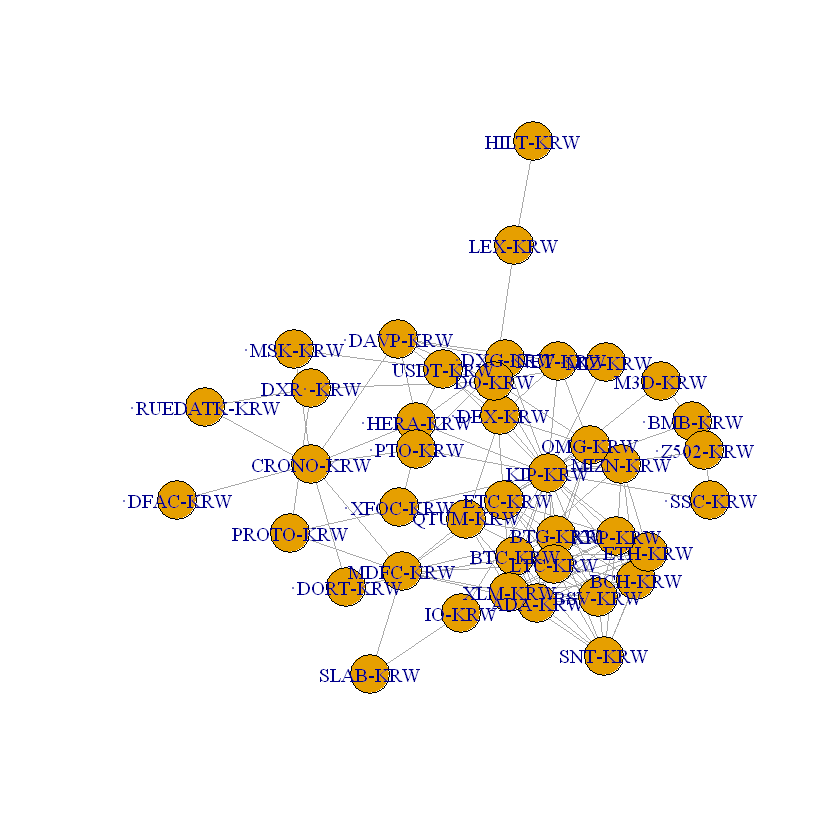

In [35]:
# weight값이 0.3이하인 weight 제거
high_g_1<-delete.edges(high_g, E(high_g)[abs(high_Weight) < 0.3])
plot(high_g_1, layout=layout.kamada.kawai,
    vertex.size=15, vertex.label.cex=1)

In [40]:
#연결중심성 - 각 노드의 중심성 산출
#연결중심성= "누구와 많이 연결되어 있는가?"
vertex_centr<-centr_degree(high_g_1, mode='all', loops=FALSE)
vertex_centr$res

[1]  2  6  6  1  2  5 11  5  2  2  4  4  2  2  3  2 13 11 11 12 14  8  8  3 11
[26]  1  2 27  2 14  2  9  6  7  3  9  2  9  4 13 12

In [73]:
#중개중심성 - 노드 사이에 위치한 정도로서 노드의 중요성 파악
vertex_betw<-estimate_betweenness(high_g_1, vids=V(high_g_1),directed = FALSE,
                    cutoff=10)
#중개중심성이 가장 높은 비트코인종류
which.max(vertex_betw)

#중개중심성이 가장 낮은 비트코인종류
which.min(vertex_betw)

KIP-KRW 
     28

·BMB-KRW 
        1

In [74]:
#근접중심성 - 다른 노드로의 근접성
#값이 클수록 단거리로 모든 노드에 접근이 가능함을 의미
vertex_close<-closeness(high_g_1, vids=V(high_g_1), mode='all', normalized = TRUE)

#근접중심성이 가장 높은 비트코인종류
which.max(vertex_close)

#근접중심성이 가장 낮은 비트코인종류
which.min(vertex_close)

KIP-KRW 
     28

HILT-KRW 
      26

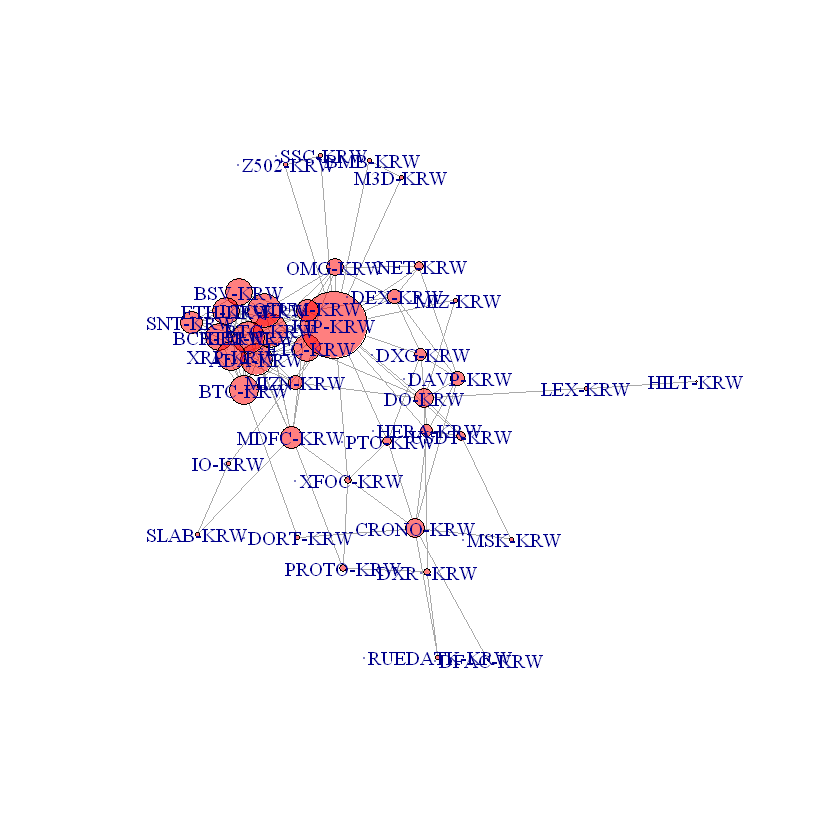

In [75]:
# 연결중심성을 vertex의 size로 나타내보기 => 간격좀어떻게하기;;
vertex_color<-adjustcolor('red',alpha.f=0.5)
plot(high_g_1, layout=layout.fruchterman.reingold, vertex.color=vertex_color,
    label.dist=5, vertex.size=vertex_centr$res)

In [89]:
library(sna)
# 네트워크 수준 분석
# 1.추이성 분석
transitivity(high_g_1)
triad_census(high_g_1)
# 2.상호호혜성
reciprocity(high_g_1)
 #2개 노드들끼리 얼마나 상관있는지
dyad_census(high_g_1)
# mut : 서로 상호주고받는 edge개수
# asym : 한쪽으만 가는 edge
# null : edge가 없는 node쌍

[1] 0.5598194

Warning message in triad_census(high_g_1):
"At motifs.c:1052 :Triad census called on an undirected graph"


[1] 6437    0 3390    0    0    0    0    0    0    0  585    0    0    0    0
[16]  248

[1] 1

Warning message in dyad_census(high_g_1):
"At motifs.c:858 :Dyad census called on undirected graph"


$mut
[1] 136

$asym
[1] 0

$null
[1] 684

In [99]:
# 서브그룹- 컴포넌트(상호 도달가능한 노드들의 집합)랑 클리크는 incidence matrix에서 추출가능함..

Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"
Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"


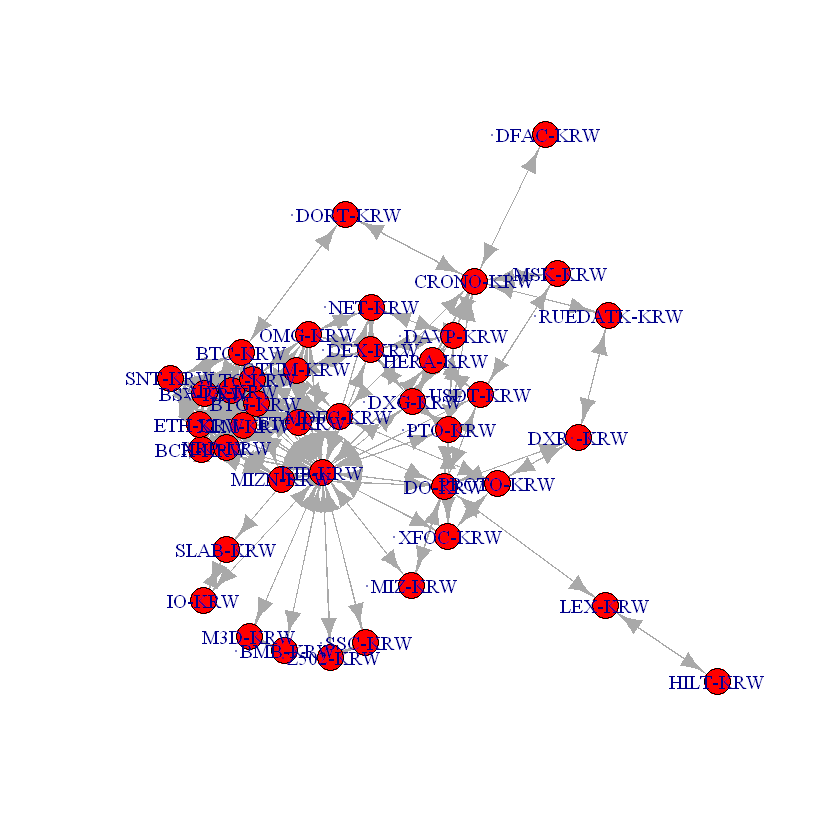

In [104]:
# 인접행렬 만들어서 graph형태로 가져오기(bi-partite graph는 아님)
high_adj<-as_adjacency_matrix(high_g_1)
n<-nrow(high_adj)
m<-ncol(high_adj)

high_adj_g<-graph_from_adjacency_matrix(high_adj)
V(high_adj_g)$color<-c(rep('red',n), rep('blue',m))
V(high_adj_g)$size<-c(rep(10,n), rep(20, m))
plot(high_adj_g)